In [18]:
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
HDF5_PATH = "/mnt/d/Datasets/PVDN/images_hdf5/PVDN_images_labels_map.hdf5"

DATASET_NAME = "VASP"
# DATASET_NAME = "PVDN"
# PVDN_DATASET_SIZE = 59746
DATASET_IMAGE_WIDTH = 1280
DATASET_IMAGE_HEIGHT = 960

DATASET_IS_GRAYSCALE = False


CLASS = ["headlight", "taillight", "other"]
CLASS_COLOR = {"headlight": (0, 255, 0), "taillight": (255, 0, 0), "other": (0, 0, 255)}
DISPLAY_IMAGE_INDEX = [2, 100, 142, 22000, 41010, 59745]

Dataset has 4492 images and 4492 labels
Data processing completed.


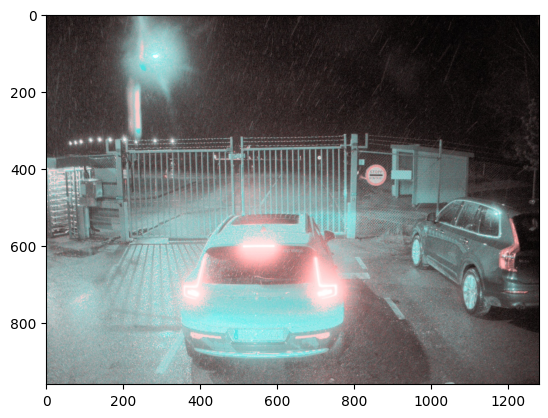

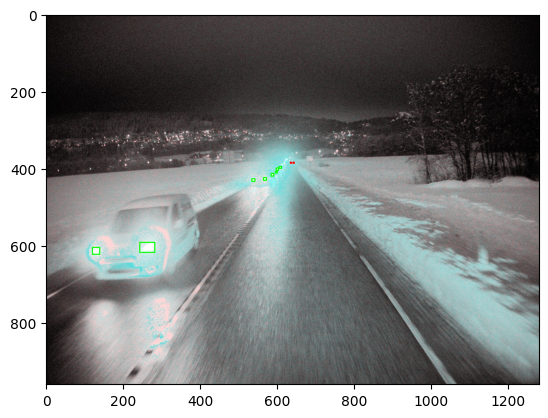

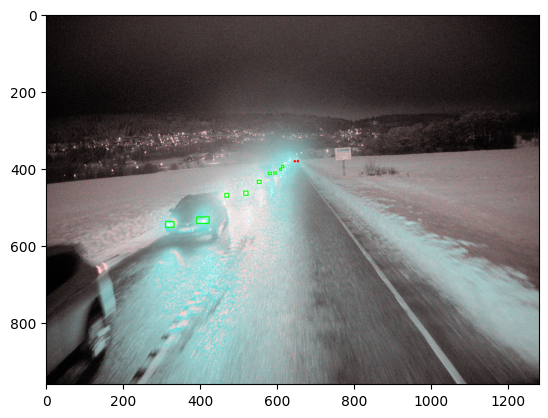

In [22]:
# Open the HDF5 file in read mode
with h5py.File(HDF5_PATH, "r") as hf:
    # Access the group containing the dataset
    group = hf[DATASET_NAME]

    # Access the datasets
    image_dataset = group["images"]
    label_dataset = group["labels"]

    image_dataset_size = image_dataset.shape[0]
    label_dataset_size = label_dataset.shape[0]

    # assert (image_dataset_size == DATASET_SIZE)

    print(f"Dataset has {image_dataset_size} images and {label_dataset_size} labels")

    for i in range(image_dataset_size):
        # print(image_name, image_index, label_index)
        
        # Processing of images and labels
        if i in DISPLAY_IMAGE_INDEX:
            # Processing images
            image_bytes = image_dataset[i]
            
            if DATASET_IS_GRAYSCALE:
                image = cv2.imdecode(image_bytes, cv2.IMREAD_GRAYSCALE)
                # Convert the grayscale image to color
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            else:
                image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Processing labels
            # Get the labels for the current entry
            labels = label_dataset[i]

            if len(labels):
                # Split the byte string into individual lines
                labels = labels.split(b'\n')
                # Parse each line as a numpy array
                labels_array = [np.fromstring(label, dtype=float, sep=' ') for label in labels]
                # Convert the list of arrays into a 2D numpy array
                labels_array = np.array(labels_array)

                for label in labels_array:
                    class_label, x, y, w, h = np.nan_to_num(label)
                    x_min = x * float(DATASET_IMAGE_WIDTH) - w * float(DATASET_IMAGE_WIDTH) / 2.0
                    y_min = y * float(DATASET_IMAGE_HEIGHT) - h * float(DATASET_IMAGE_HEIGHT) / 2.0
                    x_max = x * float(DATASET_IMAGE_WIDTH) + w * float(DATASET_IMAGE_WIDTH) / 2.0
                    y_max = y * float(DATASET_IMAGE_HEIGHT) + h * float(DATASET_IMAGE_HEIGHT) / 2.0
                    light_class = CLASS[int(class_label)]
                    
                    # Draw the rectangle on the image
                    image = cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), CLASS_COLOR[light_class], 2)
            
            # Display the image
            plt.figure()
            plt.imshow(image)
            # plt.title(f"Image {image_name}")
    
    
    print("Data processing completed.")